In [1]:
from statsfun import pascal
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore
import seaborn as sns

## Pascal's Triangle

The rows of Pascal's Triangle each form a binomial distribution.

In [2]:
row  = 15
data = pascal(row)
data

[1,
 15,
 105,
 455,
 1365,
 3003,
 5005,
 6435,
 6435,
 5005,
 3003,
 1365,
 455,
 105,
 15,
 1]

In [3]:
%matplotlib inline

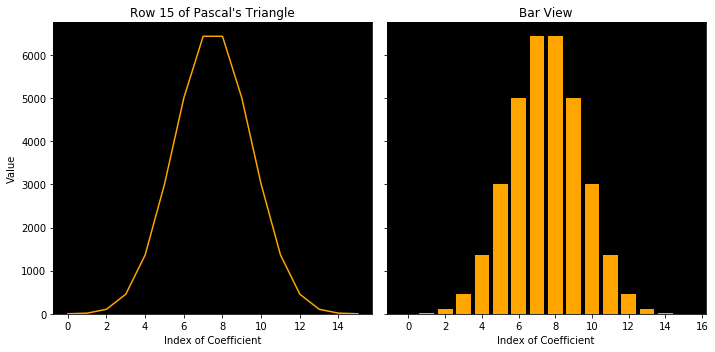

In [5]:
fig  = plt.figure(figsize=(10,5))
ax1   = plt.subplot('121')  # I will explain
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('black')

plt.title("Row {} of Pascal's Triangle".format(row))
ax1.set_xlabel('Index of Coefficient')
ax1.set_ylabel('Value')
plt.plot(data, color="orange")

ax2   = plt.subplot('122', sharey=ax1)  # I will explain
rect = ax2.patch  # a Rectangle instance
rect.set_facecolor('black')
plt.setp(ax2.get_yticklabels(), visible=False)

plt.title("Bar View".format(row))
ax2.set_xlabel('Index of Coefficient')
plt.bar(range(len(data)), data, color="orange");

fig.tight_layout()
plt.show();

## Standard Normal Distribution

In [ ]:
domain = np.linspace(-4,4,1000)  # 1000 equally spaced points between -4 and 4 inclusive
y = norm.pdf(domain, 0, 1)       # from scipy.stats
plt.plot(domain,y);              # total area under pdf == 1

## IQ Data

IQ data is often used to impart normal distribution concepts, because it's designed to have specific characteristics.  The standard deviation is defined to be 15 points, meaning every 15 points away from 100 represents one standard deviation, or a z-score of 1.0.

The z-score represents a score in terms of z-units or standard deviation units.  The probability of having a z-score of 3 or above, is the same as the probability as an IQ score of 100 + 15 + 15 + 15.  

Find the cummulative probability using the ```norm.cdf``` with the actual IQ score, given you already have a normal distribution with $\mu$ = 100 and $\sigma$ = 15.

In [ ]:
domain = np.linspace(0,200,1000)
y = norm.pdf(domain, 100, 15)
plt.plot(domain,y);

In [ ]:
def z_score(x, mu, sigma, n=1):
    return (x - mu)/(sigma/math.sqrt(n))

z = z_score(115, 100, 15) # one standard deviation above mean
z

Lets create a standard normal distribution.  Now that we have the z-score, the probability of having an IQ of 115 or below is about 84%.

In [ ]:
d = norm(0, 1) # standard normal distribution
d.cdf(z)

In [ ]:
d = norm(loc=100.0, scale=15.0) # back to the original bell curve
d.cdf(115)  # same answer as before

The probability of having an IQ of 115 or above is simply 1 minus the previous result.

In [ ]:
d = norm(loc=100.0, scale=15.0)
1 - d.cdf(115)

In [ ]:
z = z_score(93, 100, 15) # adjusted for sample size
z

In [ ]:
d = norm(0, 1)
d.cdf(z)

In [ ]:
d = norm(100, 15)
d.cdf(93) # again, same answer

In [ ]:
z = z_score(115, 100, 15)
d = norm(0, 1)
d.cdf(z)

In [ ]:
z

In [ ]:
d.ppf(0.8413447460685429)  # going backwards from cumulative population to z-score

# Three Sigma Rule

* Plus/minus 1 sigma from mean:  about 68.2% of a population
* Plus/minus 2 sigmas from mean: about 95.4% of a population
* Plus/minus 3 sigmas from mean: about 99.7% of a population

![Sigma Rule](https://corporatefinanceinstitute.com/assets/empirical-rule2.png)

In [ ]:
d = norm(100, 15)
d.cdf(100+15) - d.cdf(100-15)

In [ ]:
d = norm(100, 15)
d.cdf(100+2*15) - d.cdf(100-2*15)

In [ ]:
d = norm(100, 15)
d.cdf(100+3*15) - d.cdf(100-3*15)

### Shading Areas Under the Curve

In [ ]:
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [ ]:
d.cdf(110)-d.cdf(90)

In [ ]:
draw_z_score(domain, domain>120, 100, 15, 'z > 120')

In [ ]:
from numpy import random
sns.distplot(random.normal(loc=100, scale=15, size=1000), hist=True)
plt.show() 

In [ ]:
x = np.arange(-3,3,0.001)
z0 = -0.75
draw_z_score(x, x<z0, 0, 1, 'z<-0.75')

In [ ]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')

In [ ]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, x > z0, 0, 1, ' z> 0.75')

![overview](http://greenteapress.com/thinkstats2/html/thinkstats2026.png)

Figure 6.2: A framework that relates representations of distribution functions.

*Think Stats* by Allen B. Downing
ISBN-13: 978-1491907337
ISBN-10: 1491907339 

[Hypothesis Testing](http://greenteapress.com/thinkstats2/html/thinkstats2010.html#sec95)
*Ibid.*